# Prevendo valor de mercado de jogadores com Python


## Sobre mim

Olá! Sou um jovem rapaz da Bahia que trabalha com Desenvolvimento Web e agora decidi aprender um pouco sobre esse outro universo que é a Ciência de Dados.

Essas são minhas redes sociais:

* [LinkedIn](https://www.linkedin.com/in/lucasramosdev/)
* [GitHub](https://github.com/lucasramosdev)

## Sobre o projeto

A idéia é praticar os conceitos aprendidos no curso de [Introdução à Data Science com Python](https://www.youtube.com/watch?v=pjT_0nPiSqQ&list=PLFE-LjWAAP9SfEuLXf3qrpw4szKWjlYq9) do [Data - ICMC](http://data.icmc.usp.br/).

A base utilizada foi retirada do site [Kaggle](https://kaggle.com), do usuário [Debpritam Roy](https://www.kaggle.com/debpritamroy).

O resultado do algoritmo é dizer se o jogador vai valer ou não com base nos inputs.


#### Importações

Eu deixei as principais funções de pre-processamento em um arquivo chamado utils.py para não deixar tudo aglomerado nesse notebook. Então vamos importar ele!

In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Essa é a nossa base de jogadores
players = utils.get_players()
players

,name,date_of_birth,player_id
0,Aleksandr Hleb,1981-05-01,597
1,Mike Hanke,1983-11-05,1428
2,Youssef El Akchaoui,1981-02-18,1560
4,Heiko Westermann,1983-08-14,1726
5,Markus Miller,1982-04-08,2306
...,...,...,...
28467,Rifat Erdem,1990-02-28,199337
28468,Mücahit Atalay,1991-10-26,209569
28469,Patrick Friday Eze,1992-12-22,221118
28470,Burak Saban,1994-04-20,273053


In [3]:
#Essa é a nossa base valores ao longo das temporadas
valuations = utils.get_valuations()
valuations

,player_id,last_season,date,market_value_in_eur
0,3132,2013,2003-12-09,400000
1,6893,2012,2003-12-15,900000
2,10,2015,2004-10-04,7000000
3,26,2017,2004-10-04,1500000
4,65,2015,2004-10-04,8000000
...,...,...,...,...
424862,668268,2022,2023-06-01,12000000
424863,696589,2022,2023-06-01,5000000
424864,735571,2022,2023-06-01,5000000
424865,811778,2022,2023-06-01,7000000


In [40]:
#Essa base eu correlaciono as duas bases anteriores
stats = utils.get_stats()
stats

,player_id,last_season,date,market_value_in_eur,name,date_of_birth
0,3132,2013,2003-12-09,400000,Florin Cernat,1980-03-10
1,6893,2012,2003-12-15,900000,Gabriel Tamas,1983-11-09
2,10,2015,2004-10-04,7000000,Miroslav Klose,1978-06-09
3,26,2017,2004-10-04,1500000,Roman Weidenfeller,1980-08-06
4,65,2015,2004-10-04,8000000,Dimitar Berbatov,1981-01-30
...,...,...,...,...,...,...
424862,668268,2022,2023-06-01,12000000,Marquinhos,2003-04-07
424863,696589,2022,2023-06-01,5000000,Tim Iroegbunam,2003-06-30
424864,735571,2022,2023-06-01,5000000,Rodrigo Muniz,2001-05-04
424865,811778,2022,2023-06-01,7000000,Álvaro Fernandez,2003-03-23


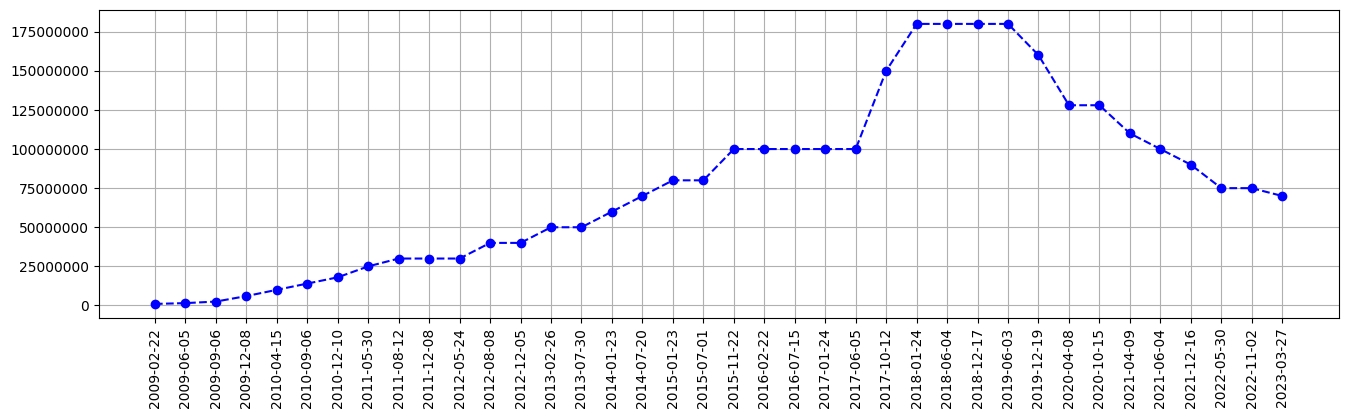

In [5]:
# Aqui a gente consegue ver o histórico do valor de mercado de um jogador
neymar = stats[stats.name == 'Neymar']
utils.show_player_history_value(neymar)

### Pré-processamento dos dados

#### Removendo coluna desnecessária

Minha ideia aqui é fazer uma correlação do jogador, da sua idade e do seu valor de mercado. Por esse motivo que vou remover apenas a coluna name. Eu quero testar se essa minha inteligência artifical consegue fazer a correlação através do id.

In [41]:
stats.drop(columns=['name'], inplace=True)

#### Normalizando as datas

O que eu penso em fazer aqui é converter as datas para timestamp, pois o campo last_season me da um inteiro enquanto os campos date e date_of_birth estão no padrão ISO-8601.

In [42]:
import pandas as pd
from datetime import datetime

stats['date_of_birth'] = pd.to_datetime(stats['date_of_birth']).astype('int64')
stats['date'] = pd.to_datetime(stats['date']).astype('int64')
stats['last_season'] = stats['last_season'].astype(str) + '-01-01'
stats['last_season'] = pd.to_datetime(stats['last_season']).astype('int64')
stats

,player_id,last_season,date,market_value_in_eur,date_of_birth
0,3132,1356998400000000000,1070928000000000000,400000,321494400000000000
1,6893,1325376000000000000,1071446400000000000,900000,437184000000000000
2,10,1420070400000000000,1096848000000000000,7000000,266198400000000000
3,26,1483228800000000000,1096848000000000000,1500000,334368000000000000
4,65,1420070400000000000,1096848000000000000,8000000,349660800000000000
...,...,...,...,...,...
424862,668268,1640995200000000000,1685577600000000000,12000000,1049673600000000000
424863,696589,1640995200000000000,1685577600000000000,5000000,1056931200000000000
424864,735571,1640995200000000000,1685577600000000000,5000000,988934400000000000
424865,811778,1640995200000000000,1685577600000000000,7000000,1048377600000000000


#### Atribuindo se o valor é maior ou menor que 50 milhões

In [43]:
def is_more_than(x):
    if x > 50000000:
        return 1
    else:
        return 0

stats['is_more'] = stats['market_value_in_eur'].apply(is_more_than)
stats

,player_id,last_season,date,market_value_in_eur,date_of_birth,is_more
0,3132,1356998400000000000,1070928000000000000,400000,321494400000000000,0
1,6893,1325376000000000000,1071446400000000000,900000,437184000000000000,0
2,10,1420070400000000000,1096848000000000000,7000000,266198400000000000,0
3,26,1483228800000000000,1096848000000000000,1500000,334368000000000000,0
4,65,1420070400000000000,1096848000000000000,8000000,349660800000000000,0
...,...,...,...,...,...,...
424862,668268,1640995200000000000,1685577600000000000,12000000,1049673600000000000,0
424863,696589,1640995200000000000,1685577600000000000,5000000,1056931200000000000,0
424864,735571,1640995200000000000,1685577600000000000,5000000,988934400000000000,0
424865,811778,1640995200000000000,1685577600000000000,7000000,1048377600000000000,0


#### Deixando os dados na mesma escala

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
print('Antes: ', stats)
scaler = MinMaxScaler()
scaler.fit(stats)
print('Durante: ', stats)
stats = pd.DataFrame(scaler.transform(stats), columns=stats.columns)
stats

Antes:          player_id          last_season                 date  \
0            3132  1356998400000000000  1070928000000000000   
1            6893  1325376000000000000  1071446400000000000   
2              10  1420070400000000000  1096848000000000000   
3              26  1483228800000000000  1096848000000000000   
4              65  1420070400000000000  1096848000000000000   
...           ...                  ...                  ...   
424862     668268  1640995200000000000  1685577600000000000   
424863     696589  1640995200000000000  1685577600000000000   
424864     735571  1640995200000000000  1685577600000000000   
424865     811778  1640995200000000000  1685577600000000000   
424866     405676  1514764800000000000  1702944000000000000   

        market_value_in_eur        date_of_birth  is_more  
0                    400000   321494400000000000        0  
1                    900000   437184000000000000        0  
2                   7000000   266198400000000000       

,player_id,last_season,date,market_value_in_eur,date_of_birth,is_more
0,0.002806,0.100192,0.000000,0.001950,0.918442,0.0
1,0.006186,0.000000,0.000820,0.004450,0.929574,0.0
2,0.000000,0.300027,0.041012,0.034952,0.913122,0.0
3,0.000014,0.500137,0.041012,0.007450,0.919681,0.0
4,0.000049,0.300027,0.041012,0.039952,0.921153,0.0
...,...,...,...,...,...,...
424862,0.600576,1.000000,0.972522,0.059953,0.988510,0.0
424863,0.626028,1.000000,0.972522,0.024951,0.989209,0.0
424864,0.661062,1.000000,0.972522,0.024951,0.982666,0.0
424865,0.729551,1.000000,0.972522,0.034952,0.988386,0.0


### Treinando um modelo de aprendizado de máquina

#### Divisão de treino e validação

In [24]:
# Vamos colocar em variavel quais são nossas features e qual é o target
target = 'is_more'
features = list(stats.columns)
features.remove(target)
features.remove('last_season')
features.remove('market_value_in_eur')
features.remove('date_of_birth')

print('Features:', features)
print('Target:', target)

Features: ['player_id', 'date']
Target: is_more


In [25]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(stats[features], stats[target], 
                                                    test_size=0.2, random_state=42)

print(input_train.shape)
print(input_test.shape)
print(output_train.shape)
print(output_test.shape)

(339893, 2)
(84974, 2)
(339893,)
(84974,)


#### Criando e treinando um modelo

In [26]:
# Importando nosso classificador
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo que usa somento um vizinho
clf = KNeighborsClassifier(n_neighbors=1)
# Treinando o modelo nos dados de treino
clf.fit(input_train, output_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# Assim podemos usar o modelo para prever a classe de novos exemplos
output_pred = clf.predict(input_test)
input_test

,player_id,date
169314,0.022503,0.627204
40057,0.030309,0.327820
178126,0.033715,0.632946
226642,0.270250,0.710731
282033,0.532334,0.797266
...,...,...
136183,0.108705,0.566097
377681,0.354870,0.902392
50944,0.008679,0.359809
290130,0.445616,0.800820


In [28]:
# Importar a função que calcula a acurácia
from sklearn.metrics import accuracy_score

acc = accuracy_score(output_test, output_pred)
print('Acurácia:', acc)

Acurácia: 0.9936451149763457


In [29]:
# Criando lista com todos os números de vizinhos que queremos testar
n_vizinhos = np.arange(1, 11) # Array de 1 a 10

# Criando uma lista para guardarmos os resultados
resultados = []

# Para cada numero de vizinhos
for k in n_vizinhos:
    # Criamos um modelo novo e treinamos ele
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(input_train, output_train)
    
    # Fazendo predição para os dados de validação e calculando acurácia
    output_pred = clf.predict(input_test)
    acc = accuracy_score(output_test, output_pred)
    
    # Salvando a acurácia para o numero atual de vizinhos
    resultados.append(acc)

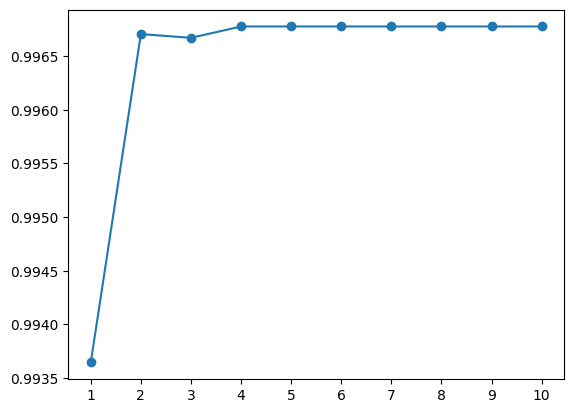

In [30]:
# No eixo x teremos o número de vizinhos e no eixo y a acurácia
plt.plot(n_vizinhos, resultados, '-o')
# Definindo que no eixo x queremos exibir cada numero de vizinhos
plt.xticks(n_vizinhos);

In [32]:
# Agora iremos salvar o modelo para utilizar em outro notebook
import pickle

# Recriado o modelo com o melhor vizinho
clf = KNeighborsClassifier(n_neighbors=4)
# Treinando o modelo nos dados de treino
clf.fit(input_train, output_train)

#exportando o modelo
with open('previsao_valor_jogadores.pkl', 'wb') as file:
    pickle.dump(clf, file)